In [1]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time
import time
import warnings
import pandas as pd
import numpy as np
from numpy import newaxis
from sklearn import preprocessing
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import TensorBoard 
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import *
from keras.optimizers import RMSprop, Adam, SGD, Nadam
from keras.layers import Merge
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger, EarlyStopping




warnings.filterwarnings("ignore")

/home/barrel/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def load_data(filename, seq_len, normalise_window):
    f=pd.read_csv(filename, delimiter = '\t')
    data=np.array(f)
    data=data.astype('float')
    data_normalize = preprocessing.normalize(data)
    data_stand = preprocessing.scale(data_normalize)
    
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data_stand) - sequence_length):
        result.append(data_stand[index: index + sequence_length])
    
    
    result = np.array(result)

    row = round(0.9 * result.shape[0])
    
    train = result[:int(row), :]
    np.random.shuffle(train)
    Y = train[:,0]
    X = train[:,1:]
    if normalise_window:
        r = np.array(Y)
        normalised_data = (r-r.mean())/(r.max()-r.min())
        Y = np.array(normalised_data)
    
    x_train = X[:, :-1]
    y_train = Y[:, -16]
    cY = result[:,0]
    cX = result[:,1:]
    x_test = cX[int(row):, :-1]
    y_test = cY[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2]))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_train.shape[2]))  

    return [x_train, y_train, x_test, y_test]

In [3]:
#Шаг 1 Загружаем данные
X_train, y_train, X_test, y_test = load_data('msft2.csv', 50, False)

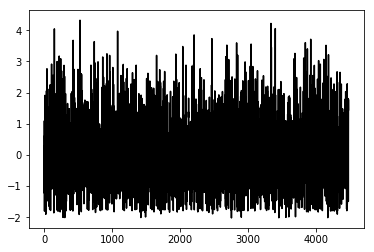

In [4]:
plt.plot(y_train, color='black', label = 'Train data')
plt.show()

In [5]:
#Шаг 2 Строим модель
model = Sequential()

model.add(LSTM(
    input_dim=16,
    output_dim=800,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    1600,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(LeakyReLU())


start = time.time()
model.compile(loss='mse', optimizer='rmsprop',)
print 'compilation time : ', time.time() - start

compilation time :  0.0128362178802


In [10]:
#Шаг 3 Обучаем модель
#tensorboard=TensorBoard(log_dir='./logs1', write_graph=True)
#history = 
model.fit(          X_train,
                    y_train,
                    batch_size=512,
                    nb_epoch=2,
                    validation_split=0.05,
                    )


Train on 4253 samples, validate on 224 samples
Epoch 1/2
4253/4253 [==============================] - 284s 67ms/step - loss: 1.1655 - val_loss: 0.6155
Epoch 2/2
4253/4253 [==============================] - 290s 68ms/step - loss: 0.6813 - val_loss: 0.6235


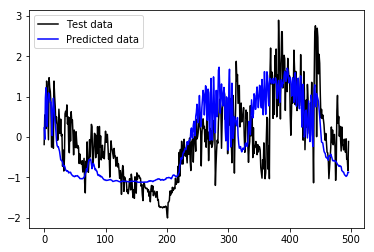

In [11]:
#Шаг 4 Визуализируем модель
#predictions = predict_point_by_point(model, X_test)
predictions = model.predict(X_test)
plt.plot(y_test, color='black', label = 'Test data')
plt.plot(predictions, color='blue', label = 'Predicted data')
plt.legend(loc='best')

plt.show()

In [14]:
#Сохраняем модель
model_yaml = model.to_yaml()

yaml_file = open("model_lstm_msft.yml","w")
yaml_file.write(model_yaml)
yaml_file.close()

model.save_weights("model_lstm_msft.h5")


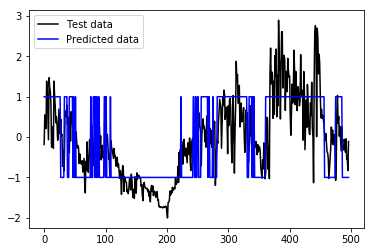

In [11]:
#Шаг 4 Визуализируем модель
#predictions = predict_point_by_point(model, X_test)
predictions = model.predict(X_test)
plt.plot(y_test, color='black', label = 'Test data')
plt.plot(predictions, color='blue', label = 'Predicted data')
plt.legend(loc='best')

plt.show()

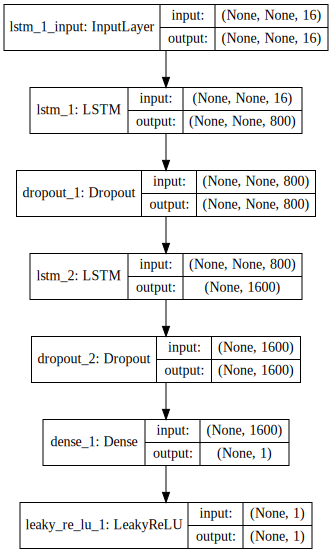

In [16]:

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))